In [334]:
# Testar os resultados do ColumnTransformer
# Ter sempre o repositório sobre o Seaborn em mãos.

<h1 style='font-size:40px'> Employee Turnover Predicting Model</h1>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            This project aims to build a binary classifier that correctly predicts if a given employee is going to stay or quit the company.
        </li>
        <li> 
            The dataset used was encountered in a <a href='https://www.coursera.org/projects/employee-turnover-scikit-learn'>Coursera Guided Project</a>. Nonetheless, I've decided to produce my own solution to the case, which is different from the platform instructor's.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Loading the Data</h2>

In [56]:
import pandas as pd
import numpy as np

# Since I am looking to create more columns to the DF, I'll modify the maximum number of columns that can be displayed.
pd.set_option('max_columns', None)

# Importing the employee data.
employee_data = pd.read_csv('employee_data.csv')
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [57]:
# Searching for anomalies in the data. All features do not present any null value and have its proper data type assigned.
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


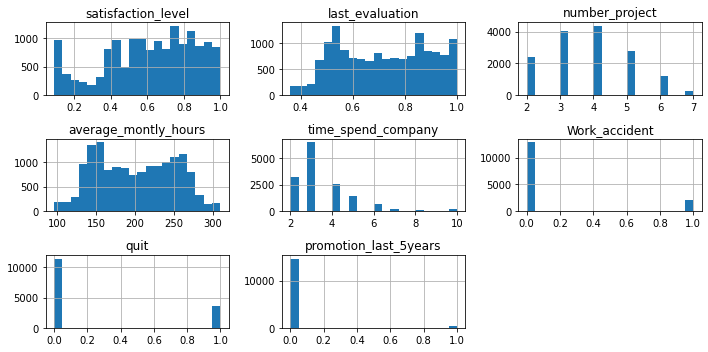

In [58]:
# Plotting a histograms frame looking for outliers.
import matplotlib.pyplot as plt
employee_data.hist(bins=20, figsize=(10,5));
plt.tight_layout()

<div> 
    <ul style='font-size:20px'> 
        <strong>> Mudar isso aqui! Falar mais sobre a importância de se ter trabalhadores experientes na empresa.</strong>
        <li> 
            The number of people who've spent more than 7 years in the enterprise looks proportionately very small. It could be a potential indicator for disconsidering them in model training. However, when we directly check the dataset, we can see that more than 350 workers are in accordance to such condition. It would be adequate to make an algorithm that neglects the reality of such number of employees? I don't think so.
        </li>
        <li> 
            Also, it is worth acknowledging that we are dealing with a dataset with a unbalanced quantity of target values. The great amount of 0's will likely make it easier to the models to correctly identify them. Conversely, the lower number of 1's requires a higher efficiency of the algorithms to apprehend the patterns among tha class' instances.
        </li>
    </ul>
</div>

In [59]:
# The well-experienced people will be kept in the dataset.
print(len(employee_data[employee_data.time_spend_company>7]))

376


<h2 style='font-size:30px'> Training and Test Sets</h2>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since salary is one of the main aspects considered when someone is deciding to stay or leave their enterprise, I'll attempt to maintain the proportions of such feature. Fortunately, that is already labeled as categories so we don't need to encode any of its values.
        </li>
    </ul>
</div>

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(employee_data, employee_data.salary):
    train = employee_data.loc[train_index]
    test = employee_data.loc[test_index]

<h2 style='font-size:30px'> Exploratory Analysis on the Training Data</h2>

<h3 style='font-size:30px;font-style:italic'> Adding new stats</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Before diving into the data examination, it is interesting to use the data we already have in order to generate new stats that might be prove useful to our models.
        </li>
        <li> 
            The new columns to be added are:
            <ul style='list-style-type:lower-alpha'>
                <li> No of projects per years of work.</li>
                <li> Harmonic mean between the satisfaction levels and last evaluation.</li>
            </ul>
        </li>
    </ul>
</div>

In [61]:
from scipy.stats import hmean
train['number_project_per_time_spend'] = train.number_project / train.time_spend_company

# Using harmonic mean can highlight possible discrepancies between the values. For instance, a given worker might be very unsatisfied (0.2)
# with the company, whereas their boss and team exceedingly enjoy working with them (0.9).

# We'll name this stat as 'reciprocity_degree'
train['reciprocity_degree'] = hmean([train.satisfaction_level, train.last_evaluation])

<h3 style='font-size:30px;font-style:italic'> Densities of staying or quitting occurences according to satisfaction and salary</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The violin plot below exposes, among every salary category, the densities of quitting and staying occurences for every satisfaction degree measured.
        </li>
        <li> 
            In all cases, employees with contentment levels lower than 50% tend to abandon the company.
        </li>
    </ul>
</div>

In [62]:
sns.violinplot(data=train, x='salary', y='satisfaction_level', hue='quit',split=True, order=['low', 'medium', 'high'])

NameError: name 'sns' is not defined

<h3 style='font-size:30px;font-style:italic'> Reciprocity scores per Department and Salary</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Now, we are zooming in the analysis about salary and satisfaction scores adding the Department feature.
        </li>
    </ul>
</div>

In [ ]:
# Segregating the employees who've quitted and still work in the company
only_0=train[train.quit==0]
only_1=train[train.quit==1]

In [ ]:
# Sorting the pivot tables by 'hr' and 'support' so the index order could be ['low', 'medium', 'high']
recip0 = pd.pivot_table(data = only_0, index='salary', columns='department', values='reciprocity_degree').sort_values(by='hr')
recip1 = pd.pivot_table(data = only_1, index='salary', columns='department', values='reciprocity_degree').sort_values(by='support')

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,4))
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.heatmap(recip0, cmap='Blues', annot=True)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Stayed')
plt.subplot(122)
sns.heatmap(recip1, cmap='Blues', annot=True)
plt.title('Quit')
plt.xlabel(None)
plt.ylabel(None)

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Some pretty interesting insights on both heatmaps. People with high incomes from IT and Support areas who've left their jobs actually had a pretty decent reciprocity levels. They were probably glad with their roles so as their team was with their performance. So what could possibly persuade them to leave?
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'>Checking out the potential quitting outliers from the IT department </h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Here, we can see the reason for the high reciprocity levels for the IT area. Two of its leaving workers had pretty high scores.
        </li>
        <li> 
            Since it is unusual for someone in that condition to decide to leave the company, it is necessary to analyze whether we can find another reason for the departure. If not, we'll consider those employees as noise in the data.
        </li>
    </ul>
</div>

In [ ]:
# Checking out the potential quitting outliers from the IT department. There are two people with reciprocity levels higher than 0.8
quit_it = only_1[(only_1['department']=='IT') & (only_1['salary']=='high')]
quit_it

In [ ]:
quit_it[quit_it['reciprocity_degree']>0.8].mean()

In [ ]:
# Now, looking at the staying workers with similar characteristics as these two, is there any other aspect that can differentiate
# them?
only_0[(only_0['department']=='IT') & (only_0['salary']=='high') & (only_0['reciprocity_degree']>0.8)].mean()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            The answer is yes! The deserters have a lower satisfaction score and work for many more hours than their staying counterparts. Therefore, we won't consider them as noise.
        </li>
    </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'>Checking out the potential quitting outliers from the Support department </h4>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Doing the same process now regarding the Support area. In this case, there are three employees with a reciprocity level higher than 0.8.
        </li>
    </ul>
</div>

In [ ]:
quit_support = only_1[(only_1['department']=='support') & (only_1['salary']=='high')]
quit_support

In [ ]:
# Extracting the mean of the features from the quitting workers.
quit_support[quit_support['reciprocity_degree']>0.8].mean()

In [ ]:
# Doing the same for those who still work for the enterprise.
only_0[(only_0['department']=='support') & (only_0['salary']=='high') & (only_0['reciprocity_degree']>0.8)].mean()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            Here, the satisfaction score doesn't seem to be part of the problem. However, the deserters still work for more hours than the ones who yet are employed in the company.
        </li>
    </ul>
</div>

In [ ]:
train.head()#.groupby('quit')['satisfaction_level'].mean()

<h3 style='font-size:30px;font-style:italic'> Workload as a factor for departure</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            The quantity of tasks that are assigned to a given worker is a vital aspect regarding their satisfaction. Offering fewer projects can make them feel undervalued; at the same time, participating in a high number of activities is prone to become something stressful.
        </li>
    </ul>
</div>

In [ ]:
# For each department, what is the average number of projects that the quitting and staying people have been assigned?
# Let's plot another pair of heatmaps to check if there are any differences.
projec_per_0 = pd.pivot_table(data = only_0, index='department', values='number_project_per_time_spend')
projec_per_1 = pd.pivot_table(data = only_1, index='department', values='number_project_per_time_spend')

In [ ]:
plt.figure(figsize=(12,4))
# Heatmap for those who are still employed.
plt.subplot(121)
sns.heatmap(projec_per_0, cmap='Blues')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Stayed')
# Heatmap for those who have left their jobs.
plt.subplot(122)
sns.heatmap(projec_per_1, cmap='Blues')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Quit')
plt.tight_layout()

<div> 
    <ul style='font-size:20px'> 
        <li> 
            The deserters tend to have a slightly lower average amount of projects during their tenure.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Treating the Dataset</h2>
<h3 style='font-size:30px;font-style:italic'> Numerical data</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Fortunately, most of the columns dealing with integers and floats are almost adequate to be applied in a model.
        </li>
        <li>
            Nevertheless, they need to be normalized. Also, it would be interesting to automate the creation of the features engendered in the beginning of the script.
        </li>
    </ul>
</div>

In [120]:
i=0
for column in train.columns:
    print(i, '-->', column)
    i+=1

0 --> satisfaction_level
1 --> last_evaluation
2 --> number_project
3 --> average_montly_hours
4 --> time_spend_company
5 --> Work_accident
6 --> quit
7 --> promotion_last_5years
8 --> department
9 --> salary
10 --> number_project_per_time_spend
11 --> reciprocity_degree


In [321]:
# The class below is a transformer that creates the extra features.
from sklearn.base import BaseEstimator, TransformerMixin

class NewNumFeatures(BaseEstimator, TransformerMixin):
    # Importing scipy.stats' hmean method.
    from scipy.stats import hmean
    def __init__(self, number_project_per_time_spend=True, reciprocity_degree=True):
        
        # This allows the user to choose whether they want to unable the generation of one of the features.
        self.number_project_per_time_spend = number_project_per_time_spend
        self.reciprocity_degree = reciprocity_degree
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
       # X = X.values
        #new_columns = []
        if self.number_project_per_time_spend:
            X.loc[:,'number_project_per_time_spend'] = X.loc[:,'number_project'] / X.loc[:,'time_spend_company']
            #new_columns.append(X[:, 2] / X[:, 4])
            #number_project_per_time_spend = np.array(X[:, 2] / X[:, 4])
            #X = np.column_stack((X, number_project_per_time_spend))
        if self.reciprocity_degree:
            X.loc[:,'reciprocity_degree'] = hmean([X.loc[:,'satisfaction_level'], X.loc[:,'last_evaluation']])
            #new_columns.append(hmean([X[:,0], X[:,1]]))
            #reciprocity_degree = np.array(hmean([X[:,0], X[:,1]]))
            #X = np.column_stack((X, number_project_per_time_spend))
         
        #new_columns = np.array(new_columns)
        #return np.c_[[X, new_columns]]
        return X.values

In [322]:
a = np.array([[1,2,3],[4,5,6]])
np.column_stack((a, np.array([1,2])))
a

array([[1, 2, 3],
       [4, 5, 6]])

In [323]:
#NewNumFeatures().fit_transform(test_train[num_cols])

In [324]:
# Building the transformation pipeline for the numerical values.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ('new_features', NewNumFeatures()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('min_max', MinMaxScaler())    
])

# Listing the numerical columns.
num_cols = [column for column in train.columns if train[column].dtype=='int64' or train[column].dtype=='float64']

<h3 style='font-size:30px;font-style:italic'> Text data</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            Since most of the scikit-learn models cannot handle strings as features, the textual informations from the dataset need to be treated.
        </li>
        <li> 
            The mission thus is trying to find numerical data based on the string informations.
        </li>
    </ul>
</div>

In [325]:
# One way to do such thing is attempting to discover the quitting rate for the categories from each column.

# For instance, let's find out the departure rate among the income levels.
gp = train.groupby(['salary','quit'])['quit'].size()
employees_per_salary = gp.sum(level=1)

quitting_rate_salary = (gp/employees_per_salary).xs(1, level=1)
quitting_rate_salary

/tmp/ipykernel_38936/3537221126.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  employees_per_salary = gp.sum(level=1)


salary
high      0.023085
low       0.601959
medium    0.374956
Name: quit, dtype: float64

In [326]:
# The column labels could be readily changed for the quitting indices with a 'replace'. 
train.salary.replace(quitting_rate_salary.to_dict())

11263    0.374956
1753     0.374956
3981     0.601959
14300    0.601959
12943    0.023085
           ...   
13235    0.374956
7785     0.601959
7882     0.023085
11061    0.374956
5936     0.374956
Name: salary, Length: 11999, dtype: float64

<div> 
    <ul style='font-size:20px'> 
        <li>
            The same process is possible to be carried out with the department column, so it would be a good idea to create a transformer which automatically handles this task.
        </li>
    </ul>
</div>

In [327]:
class MeaningFromText(BaseEstimator, TransformerMixin):
    # Here, the individual can cancel the transformation for one of the given columns.
    def __init__(self, salary=True, department=True):
        self.salary=salary
        self.department=department
        
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        global train
        if self.salary:
            quitting_and_staying = train.groupby(['salary','quit'])['quit'].size()
            employees_per_category = quitting_and_staying.sum(level=1)
            quitting_rates = (quitting_and_staying/employees_per_category).xs(1, level=1)
            # Placing the quitting rates as a new column for the DF experiencing the transformation.
            X.loc[:,'quitting_rates_salary'] = X.salary.replace(quitting_rates.to_dict())
            
        if self.department:
            quitting_and_staying = train.groupby(['department','quit'])['quit'].size()
            employees_per_category = quitting_and_staying.sum(level=1)
            quitting_rates = (quitting_and_staying/employees_per_category).xs(1, level=1)
            X.loc[:,'quitting_rates_department'] = X.department.replace(quitting_rates.to_dict())
            
        X.drop(['salary', 'department'], axis=1, inplace=True)
        return X.values

In [328]:
# Finally, constructing the pipeline for the text data.
text_pipeline = Pipeline([
            ('transformer', MeaningFromText()),
            ('imputer', SimpleImputer(strategy='most_frequent'))])

<h3 style='font-size:30px;font-style:italic'> Full Transformation Pipeline</h3>
<div> 
    <ul style='font-size:20px'> 
        <li> 
            It is time to fusion both pipelines built into a single one.
        </li>
    </ul>
</div>

In [329]:
from sklearn.compose import ColumnTransformer
# Segregating the independent from the dependent variables.
X = train[[column for column in train.columns if column != 'quit']]
y = train['quit']
num_cols = [column for column in X.columns if X[column].dtype=='float64' or X[column].dtype=='int64']
text_cols = [column for column in X.columns if X[column].dtype=='object']

full_pipeline = ColumnTransformer([
                ('num', num_pipeline, num_cols),
                ('text', text_pipeline, text_cols)
                ])

In [330]:
num_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'number_project_per_time_spend',
 'reciprocity_degree']

In [333]:
X_copy = X.copy()
test_train = train.copy()
full_pipeline.fit_transform(test_train.iloc[:])

/tmp/ipykernel_38936/1796859430.py:14: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  employees_per_category = quitting_and_staying.sum(level=1)
/tmp/ipykernel_38936/1796859430.py:21: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  employees_per_category = quitting_and_staying.sum(level=1)


array([[0.97802198, 0.96875   , 0.4       , ..., 0.97615747, 0.37495628,
        0.07555089],
       [0.9010989 , 1.        , 0.4       , ..., 0.9438265 , 0.37495628,
        0.03602658],
       [0.67032967, 0.65625   , 0.4       , ..., 0.68746956, 0.60195873,
        0.28191675],
       ...,
       [0.61538462, 0.328125  , 0.2       , ..., 0.53194381, 0.02308499,
        0.28191675],
       [0.89010989, 0.578125  , 0.        , ..., 0.76888837, 0.37495628,
        0.15739769],
       [0.52747253, 0.28125   , 0.4       , ..., 0.46902045, 0.37495628,
        0.19832109]])

In [332]:
test_train = train.copy()
test_

NameError: name 'test_' is not defined